# <span style='color:Green'>**Exploratory Data Analysis on Indian Agricultural Data** </span>


## <span style='color:Green'>Overview

#### This dataset provides information about crop production in India for a period of 15 years. 
#### EDA of this dataset would give insights into Indian agriculture status: state-wise,district-wise, crop-wise, area-wise levels of  production

#### Features in this dataset

state:         Name of Indian State (eg, Andhra Pradesh, Punjab e.t.c)
    
district:      Name of district (eg, Godavari , Srikakulam)
    
crop:          Crop produced (e.g. Rice)
    
year:          Year of production 1998-99
    
season:        Season of production (e.g. Rabi, Kharif, All seasons)
    
area:          Area of production in Hectare
    
production:    Crop produced in Tonnes
    
yield:         In Tonnes/Hectare(Returns per Hectare)

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import seaborn as sns
%matplotlib inline

#### Load Dataset

In [2]:

df = pd.read_csv('Agri_Data.csv')

In [3]:
df.head()

,Unnamed: 0,state,district,crop,year,season,area,production,yield
0,0,ANDHRA PRADESH,ADILABAD,Rice,1998-99,Kharif,66400.0,152300.0,2.293675
1,1,ANDHRA PRADESH,ADILABAD,Rice,1998-99,Rabi,12200.0,33500.0,2.745902
2,2,ANDHRA PRADESH,ADILABAD,Rice,1999-00,Kharif,66388.0,162451.0,2.446993
3,3,ANDHRA PRADESH,ADILABAD,Rice,1999-00,Rabi,10980.0,26616.0,2.424044
4,4,ANDHRA PRADESH,ADILABAD,Rice,2000-01,Kharif,70645.0,146235.0,2.069998


#### Data Dimension

In [4]:
df.shape

(175611, 9)

#### Check missing values

In [5]:
df.isnull().sum()

Unnamed: 0       0
state            0
district         0
crop             0
year             1
season           0
area             4
production    2558
yield         2558
dtype: int64

#### Dropping unwanted column

In [6]:
df.drop(['Unnamed: 0'], axis = 1,inplace = True)

#### Droping the raws with NaN values , as it contains only 1.4% of the total data

In [7]:
df.dropna(inplace = True)
df.reset_index(drop = True)

,state,district,crop,year,season,area,production,yield
0,ANDHRA PRADESH,ADILABAD,Rice,1998-99,Kharif,66400.0,152300.0,2.293675
1,ANDHRA PRADESH,ADILABAD,Rice,1998-99,Rabi,12200.0,33500.0,2.745902
2,ANDHRA PRADESH,ADILABAD,Rice,1999-00,Kharif,66388.0,162451.0,2.446993
3,ANDHRA PRADESH,ADILABAD,Rice,1999-00,Rabi,10980.0,26616.0,2.424044
4,ANDHRA PRADESH,ADILABAD,Rice,2000-01,Kharif,70645.0,146235.0,2.069998
...,...,...,...,...,...,...,...,...
173047,GOA,GOA NORTH,Sugarcane,2007-08,Whole year,224.0,14261.0,63.665179
173048,GOA,GOA SOUTH,Sugarcane,2004-05,Whole year,915.0,43480.0,47.519126
173049,GOA,GOA SOUTH,Sugarcane,2005-06,Whole year,870.0,41912.0,48.174713
173050,GOA,GOA SOUTH,Sugarcane,2006-07,Whole year,876.0,43269.0,49.393836


#### Droping two rows which showed the value 'Year' under year column

In [8]:
df[df.year == 'Year']

,state,district,crop,year,season,area,production,yield
101825,ORISSA,KORAPUT,Ragi,Year,Summer,9.0,6.6,0.733333
154022,UTTAR PRADESH,ETAWAH,Sugarcane,Year,Whole year,1103.0,56665.0,51.373527


In [9]:
df = df[df.year != 'Year']

In [10]:
df[df.year == 'Year']   

,state,district,crop,year,season,area,production,yield


In [11]:
df.shape

(173050, 8)

In [12]:
df.isnull().sum()

state         0
district      0
crop          0
year          0
season        0
area          0
production    0
yield         0
dtype: int64

In [13]:
df.dtypes

state          object
district       object
crop           object
year           object
season         object
area          float64
production    float64
yield         float64
dtype: object

#### Basic summary and information regarding the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173050 entries, 0 to 175610
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   state       173050 non-null  object 
 1   district    173050 non-null  object 
 2   crop        173050 non-null  object 
 3   year        173050 non-null  object 
 4   season      173050 non-null  object 
 5   area        173050 non-null  float64
 6   production  173050 non-null  float64
 7   yield       173050 non-null  float64
dtypes: float64(3), object(5)
memory usage: 11.9+ MB


In [15]:
df.describe()

,area,production,yield
count,1.730500e+05,1.730500e+05,173050.000000
mean,1.240436e+04,2.230446e+05,18.508716
std,3.934602e+04,9.256767e+06,393.961502
min,2.000000e-01,0.000000e+00,0.000000
25%,9.700000e+01,9.900000e+01,0.501137
50%,6.780000e+02,7.800000e+02,1.000000
75%,4.991000e+03,7.259250e+03,2.207788
max,1.020181e+06,1.250800e+09,24414.676071


#### Number of unique values

In [16]:
df.state.nunique()

33

In [17]:
df.district.nunique()

645

In [18]:
df.crop.nunique()

50

In [19]:
df.season.nunique()

6

#### This dataset contains information about 50 different agriculture crops cultivated in 6 major cropping seasons. 
#### Data has the agriculture production details of  646 districts from 33 states.

### <span style='color:red'>1. Top 5 states in rice production

In [23]:
sort_state = (df[df.crop == 'Rice']).groupby('state').production.sum()
states = sort_state.sort_values(ascending = False)
states.head()


state
WEST BENGAL       169958186.0
ANDHRA PRADESH    161534612.0
UTTAR PRADESH     151898372.0
PUNJAB            132646000.0
ORISSA            106254062.0
Name: production, dtype: float64

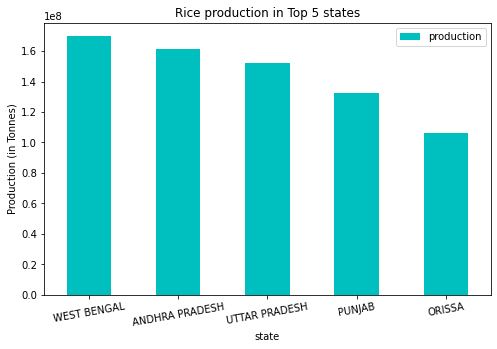

In [24]:
plt.figure(figsize = (8,5))
states.head().plot(kind = 'bar',color = 'c')
plt.ylabel('Production (in Tonnes)')
plt.title('Rice production in Top 5 states')
plt.xticks(rotation = 10)
plt.legend()
plt.show()

### <span style='color:red'> 2 . Rice production trend of Punjab over 15 years

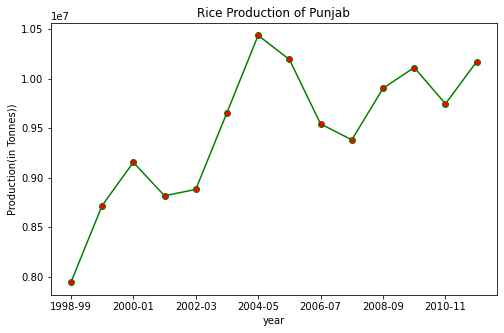

In [26]:
plt.figure(figsize = (8,5))
(df[(df.crop == 'Rice') & (df.state == 'PUNJAB')].groupby('year')).production.sum().plot(kind = "line",marker = 'o',color = 'g',mfc = 'r')
plt.ylabel('Production(in Tonnes))')
plt.title('Rice Production of Punjab')

plt.show()

### <span style='color:red'>3. Identify the most produced Rabi crop

In [27]:
df[df.season == 'Rabi'].crop.value_counts().head()

Wheat                5797
Rapeseed &Mustard    5404
Gram                 5373
Linseed              3285
Barley               3072
Name: crop, dtype: int64

#### conclusion : Most produced Rabi crop is Wheat

### <span style='color:red'> 4. Five states having maximum agriculture land(area)

In [120]:
area = df.groupby(['state','year']).area.sum()

In [121]:
areadf = area.reset_index()
areadf.rename(columns = {'area' : 'area_sum'},inplace = True)

In [122]:
areadf

,state,year,area_sum
0,A & N ISLANDS,2000-01,44385.000
1,A & N ISLANDS,2001-02,41163.000
2,A & N ISLANDS,2002-03,45146.300
3,A & N ISLANDS,2003-04,44713.110
4,A & N ISLANDS,2004-05,45218.468
...,...,...,...
394,WEST BENGAL,2005-06,8171335.000
395,WEST BENGAL,2006-07,8242661.000
396,WEST BENGAL,2007-08,8265396.000
397,WEST BENGAL,2008-09,8382515.000


In [123]:
mean_area = areadf.groupby('state').area_sum.mean()
top = (mean_area.sort_values(ascending = False)).head()



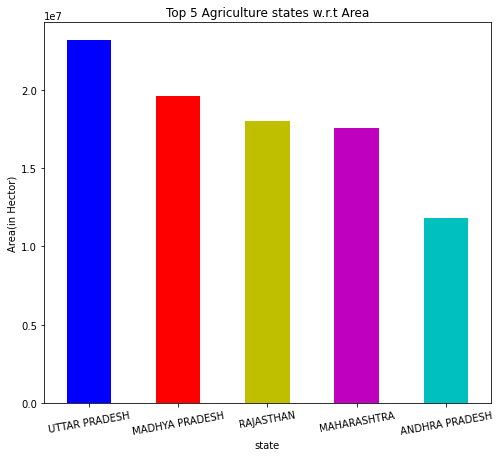

In [126]:
plt.figure(figsize = (8,7))
top.plot(kind = 'bar',color = ['b','r','y','m','c'])
plt.xticks(rotation = 10)
plt.ylabel('Area(in Hector)')
plt.title('Top 5 Agriculture states w.r.t Area')
plt.show()

### <span style='color:red'> 5.Most produced crop in Kerala

In [127]:
(df[df.state == 'KERALA'].crop.value_counts()).head(5)

Rice        561
Turmeric    195
Banana      195
Arecanut    195
Coconut     182
Name: crop, dtype: int64

#### Rice is the most produced crop in the state of Kerala

### <span style='color:red'>6.Most produced crop in Maharashtra

In [29]:
(df[df.state == 'MAHARASHTRA'].crop.value_counts()).head(5)

Sunflower    793
Maize        720
Groundnut    663
Jowar        625
Sesamum      543
Name: crop, dtype: int64

#### Sunflower is the most produced crop in Maharashtra

### <span style='color:red'> 7.Most produced crop in Punjab

In [30]:
(df[df.state == 'PUNJAB'].crop.value_counts()).head(5)

Wheat                238
Rice                 238
Rapeseed &Mustard    212
Gram                 160
Moong                157
Name: crop, dtype: int64

#### Wheat is the most produced crop in Punjab

### <span style='color:red'> 8. In which year does the production went to minimum

In [128]:
minmum = df.groupby('year').production.sum().reset_index()
minmum

,year,production
0,1998-99,6.744579e+08
1,1999-00,7.150570e+08
2,2000-01,1.792670e+09
3,2001-02,1.842412e+09
4,2002-03,1.829072e+09
5,2003-04,1.885297e+09
6,2004-05,1.847691e+09
7,2005-06,1.604026e+09
8,2006-07,2.046993e+09
9,2007-08,6.964978e+08


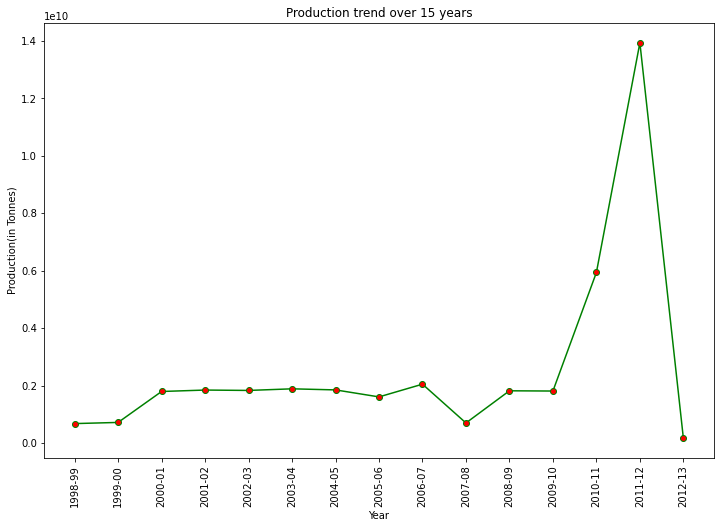

In [129]:
plt.figure(figsize= (12,8))
plt.plot(minmum.year,minmum.production ,marker = 'o',color = 'g',mfc = 'r')
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Production(in Tonnes)')
plt.title('Production trend over 15 years')
plt.show()


#### Year 2012-13 has the lowest production 

### <span style='color:red'>9. Top 5 Rabi crops(In terms of production)


In [16]:
top5_rabi = (df[df.season == 'Rabi'].groupby('crop').production.sum().sort_values(ascending = False).head()).to_frame(name = 'production').reset_index()
top5_rabi

,crop,production
0,Wheat,9.925684e+08
1,Potato,9.720664e+07
2,Gram,7.466257e+07
3,Rapeseed &Mustard,7.191322e+07
4,Rice,6.789668e+07


In [17]:

top5_rabi.iplot(kind = "barh",x = 'crop',y = 'production',xTitle= 'Production',yTitle='Crops',title = 'Top 5 Rabi crops',colors=['pink'])


### <span style='color:red'>10. Top 5 Kharif producing states

In [18]:
kharif_state = df[df.season == 'Kharif'].groupby('state').production.sum().sort_values(ascending = False).head().to_frame(name = 'production').reset_index()
kharif_state

,state,production
0,UTTAR PRADESH,1.048026e+09
1,MAHARASHTRA,4.550611e+08
2,ANDHRA PRADESH,1.955706e+08
3,PUNJAB,1.627118e+08
4,GUJARAT,1.604038e+08


In [19]:
kharif_state.iplot(kind = "bar",x = 'state',y = 'production',xTitle= 'States',yTitle='Production',title = 'Top 5 Kharif producing states',colors=['indigo'])

### <span style='color:red'> 11. List the best produced crops based on season

In [40]:
seasn = df.season.value_counts()

In [41]:
for season in seasn.index:
    dt = (df[df.season == season].crop.value_counts()).head(1)   # value_count Function list in descending order by default
    print('The best produced crop in  '+ season  + ' season is : ' + (np.array(dt.index))[0])
    print(' ')

The best produced crop in  Kharif season is : Maize
 
The best produced crop in  Rabi season is : Wheat
 
The best produced crop in  Whole year season is : Sugarcane
 
The best produced crop in  Summer season is : Rice
 
The best produced crop in  Winter season is : Rice
 
The best produced crop in  Autumn season is : Rice
 


### <span style='color:red'>12.   In Kerala which district is best for rice production

In [33]:
(df[(df.state == 'KERALA') & (df.crop == 'Rice')].groupby('district').production.sum()).sort_values(ascending = False)

district
PALAKKAD          3443584.129
ALAPPUZHA         1222880.211
THRISSUR          1035888.297
ERNAKULAM          659088.949
KOTTAYAM           515987.088
MALAPPURAM         453629.976
WYNAD              443922.278
KOLLAM             256201.098
KANNUR             238724.045
KASARGOD           183367.822
TRIVANDRUM         165682.475
PATHANAMTHITTA     155069.976
IDUKKI             101027.876
KOZHIKODE           90890.371
Name: production, dtype: float64

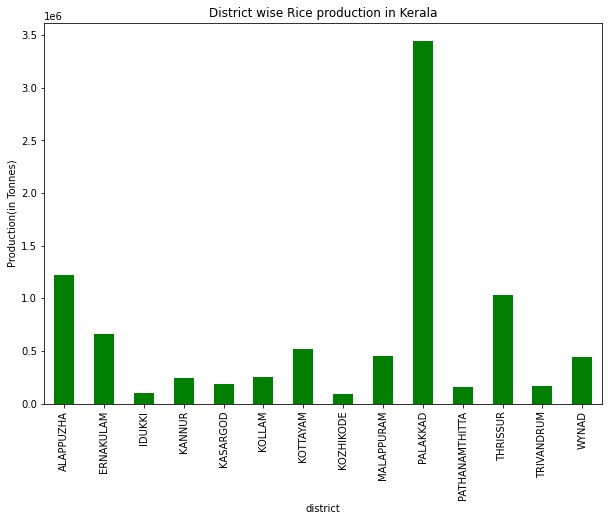

In [134]:
plt.figure(figsize = (10,7))
df[(df.state == 'KERALA') & (df.crop == 'Rice')].groupby('district').production.sum().plot(kind = 'bar',color = 'g')
plt.ylabel('Production(in Tonnes)')
plt.title('District wise Rice production in Kerala')
plt.show()

#### Maximum rice production in Kerala occurs in Palakkad District .

### <span style='color:red'> 12. Identify the crop that gives maximum yield 

In [44]:
(df.groupby('crop')['yield'].sum().reset_index().sort_values(by = 'yield',ascending = False)).head(5)

,crop,yield
9,Coconut,2.461351e+06
42,Sugarcane,3.076249e+05
33,Potato,6.793126e+04
29,Onion,5.953662e+04
3,Banana,5.887487e+04


In [45]:
df[df.crop == 'Coconut'].season.value_counts()

Whole year    1453
Kharif          15
Rabi             3
Name: season, dtype: int64

#### Coconut  the whole year crop ,gives maximum yield .

### <span style='color:red'>13.  Five least produced crop in India

In [46]:
(df.groupby('crop').production.sum().sort_values()).head(5)

crop
Cardamom        1.117431e+05
Sannhamp        4.431890e+05
Black pepper    1.100257e+06
Niger seed      1.150757e+06
Cashewnut       1.560173e+06
Name: production, dtype: float64

#### <span style='color:red'>14.  Cardamom production in different states

In [136]:
cardm = df[df.crop == 'Cardamom'].state.value_counts()
cardm

TAMIL NADU     91
KERALA         80
KARNATAKA      68
NAGALAND       16
WEST BENGAL     9
Name: state, dtype: int64

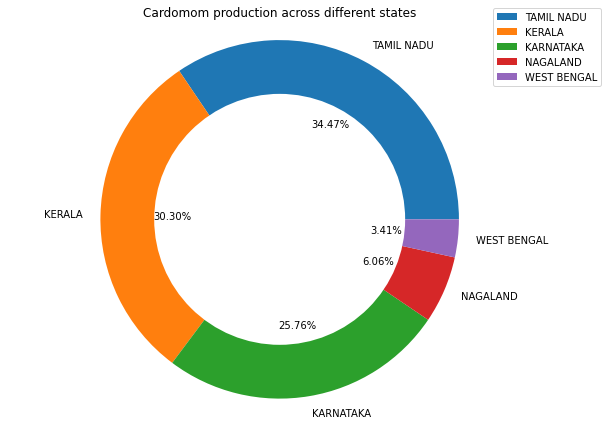

In [137]:
labels = cardm.index
fig,ax = plt.subplots(figsize = (8,6))
ax.pie(cardm,autopct="%0.2f%%" , labels = cardm.index)
centre_circle = plt.Circle((0,0),0.70,fc='White')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.set_title("Cardomom production across different states")
ax.axis('equal')  
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### <span style='color:red'>15. Five most produced crops in India

<AxesSubplot:xlabel='crop', ylabel='production'>

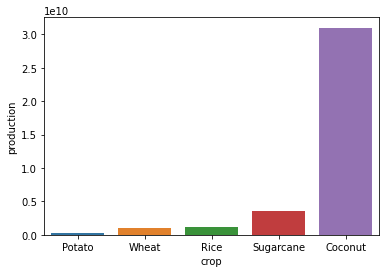

In [49]:
crop_data = df.groupby('crop').production.sum().reset_index().sort_values(by = 'production')
data1 = crop_data.tail()
sns.barplot(x = 'crop',y = 'production',data= data1)


In [50]:
data1

,crop,production
33,Potato,2.947480e+08
49,Wheat,9.926225e+08
36,Rice,1.161929e+09
42,Sugarcane,3.584729e+09
9,Coconut,3.100291e+10


### <span style='color:red'>16.   Production of Top 4 Crops over the years

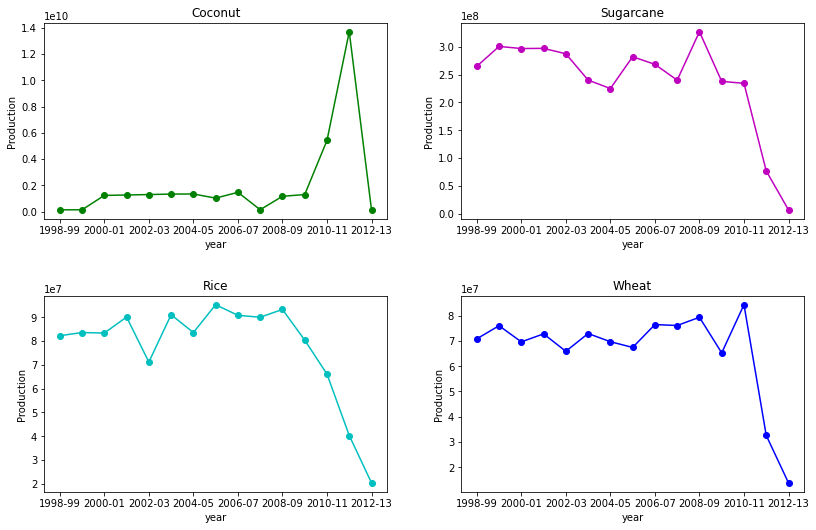

In [51]:
fig,ax = plt.subplots(2,2,figsize = (12,8))
(df[df.crop == 'Coconut'].groupby(['year'])).production.sum().plot(kind = 'line',ax = ax[0][0],marker = 'o',color = 'g')
ax[0][0].set_title('Coconut')
ax[0][0].set_ylabel('Production')
(df[df.crop == 'Sugarcane'].groupby(['year'])).production.sum().plot(kind = 'line',ax = ax[0][1],marker = 'o',color = 'm')
ax[0][1].set_title('Sugarcane')
ax[0][1].set_ylabel('Production')
(df[df.crop == 'Rice'].groupby(['year'])).production.sum().plot(kind = 'line',ax = ax[1][0],marker = 'o',color = 'c')
ax[1][0].set_title('Rice')
ax[1][0].set_ylabel('Production')
(df[df.crop == 'Wheat'].groupby(['year'])).production.sum().plot(kind = 'line',ax = ax[1][1],marker = 'o',color = 'b')
ax[1][1].set_title('Wheat')
ax[1][1].set_ylabel('Production')
fig.tight_layout(pad=3.0)

### <span style='color:red'>17. As the year 2012- 13 witnessed a low productivity compared to previous years, identity the top 10 better performed crops in that year

In [52]:
dfy = df[df.year == '2012-13']

In [53]:
(dfy.groupby('crop')['yield'].sum().reset_index().sort_values(ascending = False,by = 'yield')).head(10)

,crop,yield
8,Coconut,4772.868699
35,Sugarcane,3451.864367
27,Potato,522.746966
30,Rice,243.795027
19,Maize,193.574543
38,Tapioca,161.755920
41,Wheat,150.697376
11,Dry ginger,110.907006
13,Groundnut,97.395213
37,Sweet potato,68.190909


### <span style='color:red'> 18.  Correlation between the features

In [54]:
df.corr()

,area,production,yield
area,1.000000,0.028763,-0.000421
production,0.028763,1.000000,0.516992
yield,-0.000421,0.516992,1.000000


<AxesSubplot:>

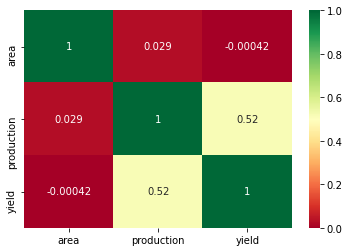

In [55]:
sns.heatmap(df.corr(),annot = True,cmap = 'RdYlGn')

#### Production and Yield features are showing Positive correlation

### <span style='color:red'> 19.   Per Hector production Graph of various Indian states 

<AxesSubplot:xlabel='production', ylabel='state'>

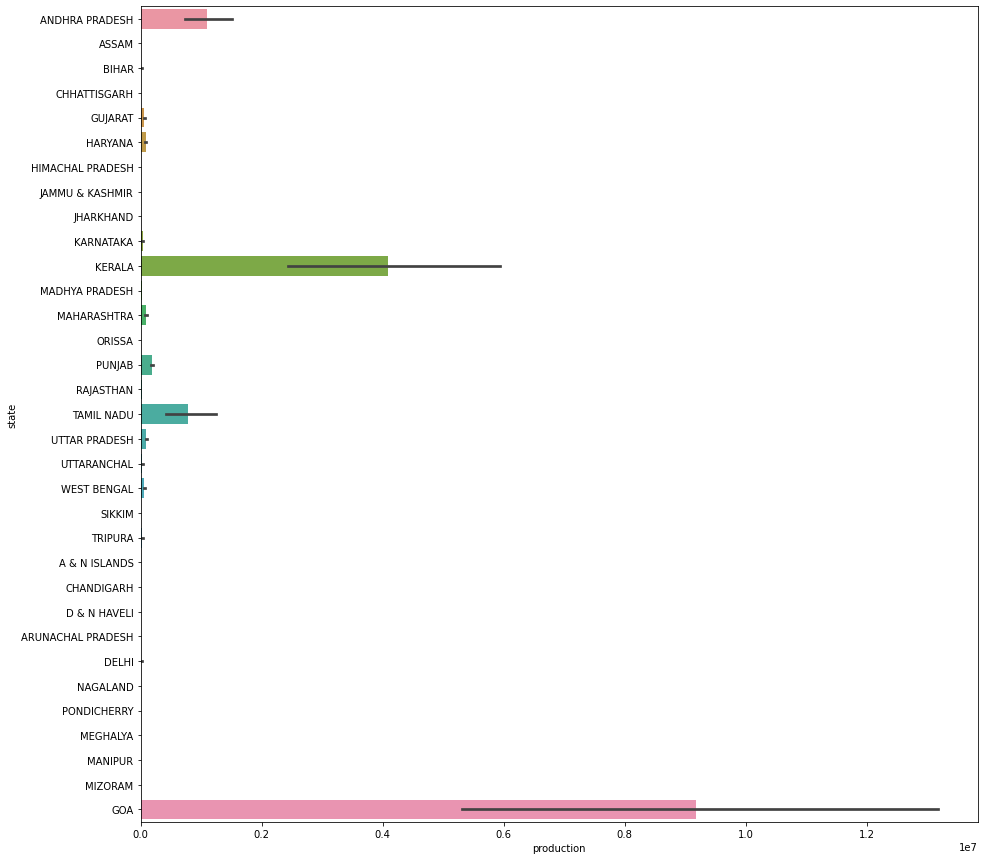

In [56]:
plt.figure(figsize= (15,15))
sns.barplot(x=df['production'],y= df["state"], orient='h')

#### Goa tops the list as it has maximum per hector production(As the state is small per hector production will be more)

### <span style='color:red'>20.   Percentage production of top 10 districts

In [76]:
cent = ((df.groupby('district').production.sum().reset_index().sort_values(by = 'production',ascending = False))).head(10)

In [77]:
sum_max = cent.production.sum()

In [78]:
cent['percentage_production']= cent.production.map(lambda x : (x/sum_max)*100)

In [79]:
cent

,district,production,percentage_production
184,EAST GODAVARI,6.026258e+09,30.872576
635,WEST GODAVARI,2.694427e+09,13.803574
380,MALAPPURAM,1.875909e+09,9.610302
341,KOZHIKODE,1.633131e+09,8.366546
231,Goa,1.377571e+09,7.057308
130,COIMBATORE,1.285225e+09,6.584218
566,SRIKAKULAM,1.251505e+09,6.411473
295,KANNUR,1.181465e+09,6.052655
589,THRISSUR,1.109858e+09,5.685813
597,TRIVANDRUM,1.084428e+09,5.555536


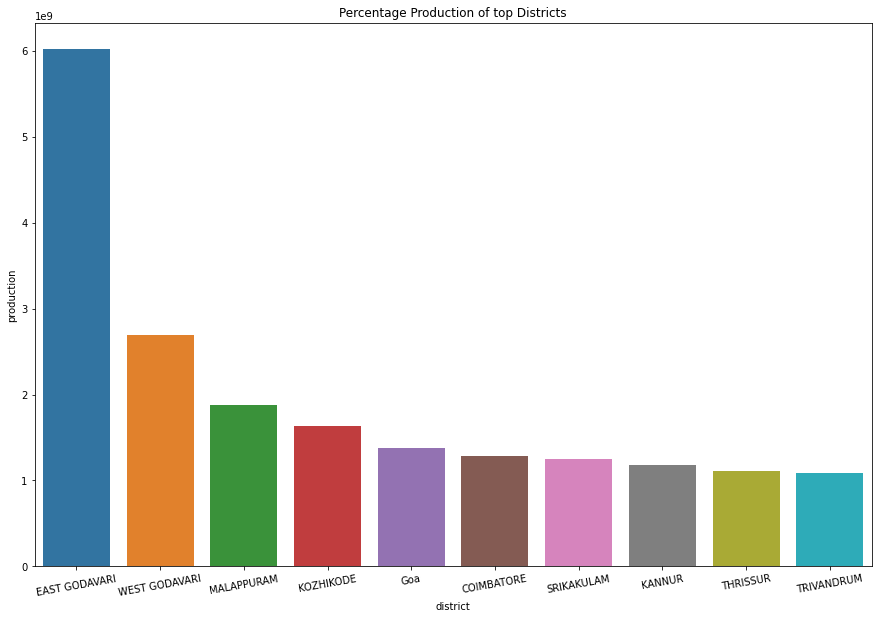

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x = "district",y = "production",data=cent)
plt.title('Percentage Production of top Districts')
plt.xticks(rotation=10)
plt.show()

### <span style='color:red'>Top 3 crops in overall production

In [62]:
(df.groupby('crop').production.sum().sort_values(ascending = False)).head(3)

crop
Coconut      3.100291e+10
Sugarcane    3.584729e+09
Rice         1.161929e+09
Name: production, dtype: float64

### <span style='color:red'> Season wise production of Uttar Pradesh

In [63]:
df[df.state == 'UTTAR PRADESH'].season.value_counts()

Kharif        9995
Rabi          8209
Whole year    2696
Summer        2403
Name: season, dtype: int64

## <span style='color:Green'> Final Conclusion

**Started with 175611 samples with 8 columns.<br>
Production and Yield columns had 2559 missing values(1.4% of total data), which was dropped.<br>
Final dataset has 173050 sample and 8 columns.<br>
Top states contributing to the dataset are Uttar Pradesh, Madhya Pradesh,Rajasthan,Maharashtra & AP.<br>
Production wise top crops are Coconut,Sugarcane and Rice.<br>
Total production hit peak in 2011-12.<br>
Top producing state Uttar Pradesh has more crop production in Kharif and Rabi seasons.<br>
90% cultivation of the least producing crop, Cardomom happens in South Indian states like Tamil Nadu,Kerala & Karnataka.<br>
Correlation between production and Yield shows rate of production is directly proportional to rate of yield.**

## <span style='color:Green'> Future Scope

#### ML models can be build to predict the crop yield, based on geography , seasons,area of cultivation and production rates.
